In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## About Me

Info | Description
---|---
Name| Gurdeep 
Roll no.| 22f3001660
Course Code | CS2008p
Email| 22f3001660@ds.study.iitm.ac.in

## Data Information

- This can be considered under the first step of ML project discussed, looking at the bigger picture

- The problem, discussed above, is a regression problem. So, we would be needed to apply a regression model to the data to get the desired output

- Evaluation is to be done based on the accuracy_score metric
***
- Three files have been provided to us in the competition:

1. **train_data.csv**

- This contains the train_dataing data in the .csv format
- Contains our target column as "Rating"
- Features to be discussed during EDA

2. **test_data.csv**
- test_data data on which evaluation is to be performed

3. **sample.csv**
- Sample submission

# Importing the train and test data
- Let's load the dataset uploaded in this notebook for further analysis.

In [110]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

# Exploratory Data Analysis

Let's leverage the data card to quickly identify the data's column types. We'll focus on analyzing the statistical summaries of the numerical columns to glean insights without getting bogged down in detailed explanations of each variable.

In [111]:
train_data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [112]:
train_data.tail()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...
13635,379,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_278956,u_1oKYPsERQ0GvUcjIsuAxzmnsQGW,morgantowndan,1,1622717703,0,0,0,5,100,Super. I added 1/2 lb chopped bacon to mine. H...


In [113]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [114]:
train_data.nunique()

ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13636
UserID               10783
UserName             10620
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64

In [115]:
train_data.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

#### Since there are 2 null values so there is no need of any kind of imputer we can simply remove them

In [116]:
columns = train_data.columns
columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')

In [117]:
cols_to_drop = ["ID","CommentID","UserName","RecipeCode","UserID","CreationTimestamp","RecipeName","RecipeNumber"]
new_train_data= train_data.drop(cols_to_drop,axis=1)
new_test_data = test_data.drop(cols_to_drop,axis=1)
new_train_data

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,20,0,0,0,5,100,great recipe! I have made them just as written...
1,1,0,0,1,5,100,This is an easy and quick recipe that is great...
2,1,0,0,0,3,100,I think I was looking for something extra spec...
3,1,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,1,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
...,...,...,...,...,...,...,...
13631,1,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,1,0,0,0,5,100,I made this pie for my family and they loved i...
13633,1,0,0,0,5,100,Very tasty!
13634,1,0,0,0,5,100,I have made this numerous times. It&#39;s so ...


In [118]:
new_train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UserReputation,13636.0,2.160311,10.086424,0.0,1.0,1.0,1.0,510.0
ReplyCount,13636.0,0.014520,0.137323,0.0,0.0,0.0,0.0,3.0
ThumbsUpCount,13636.0,1.098269,4.166487,0.0,0.0,0.0,0.0,80.0
ThumbsDownCount,13636.0,0.543708,3.265660,0.0,0.0,0.0,0.0,126.0
Rating,13636.0,4.288721,1.544839,0.0,5.0,5.0,5.0,5.0
BestScore,13636.0,153.127897,140.986908,0.0,100.0,100.0,100.0,946.0


In [119]:
cat_cols = new_train_data.select_dtypes(include=['object']).columns
num_cols = new_train_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Recipe_Review'], dtype='object')
Numerical Variables:
['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']


### Conclusions from analyzing statistics

From the above statistics obtained from the numerical column of train_data data we can conculude that
- all analyzed columns exclusively contain positive values.
- in most columns, the quartiles are very close to the mode, suggesting a potential skew in the data distribution or a limited range of values.
- the very low frequency of zero value in the "Recipe_Review" column

# Vizualizing the data

Let's delve into the connections between features and the target variable by looking at different charts:

- Target vs. Feature Visualizations: We'll create scatter plots (or other charts depending on the data type) to uncover patterns between each feature and the target variable. This will help us grasp how each feature might contribute to the target.

- PairPlot: to creates a matrix of scatter plots, showing the relationship between every single pair of features in data and to identify patterns and potential correlations between features.

- Boxplot Breakdown: We'll use boxplots to show the distribution of features and identify any outliers. Outliers can heavily influence models, so it's important to understand if they exist.

- Scaling's Influence: To see how scaling affects the data's distribution, we'll create kernel density estimation (KDE) plots before and after scaling the features. KDE plots show the probability density of the data, allowing us to visualize how scaling changes the spread and shape of the data.


UserReputation
Skew :  33.15


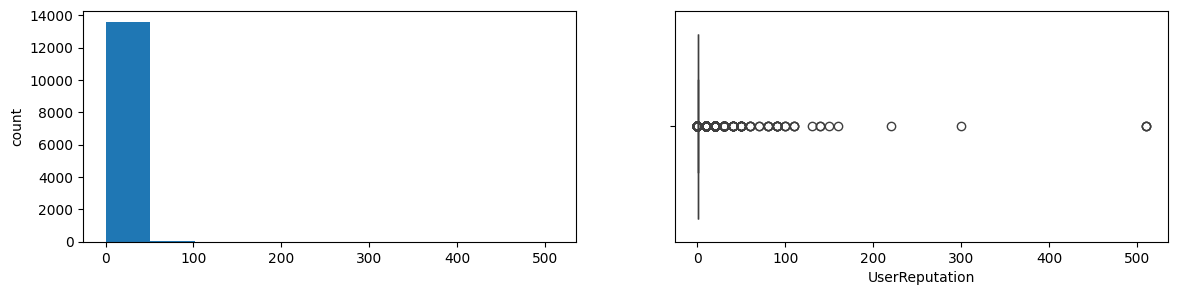

ReplyCount
Skew :  11.41


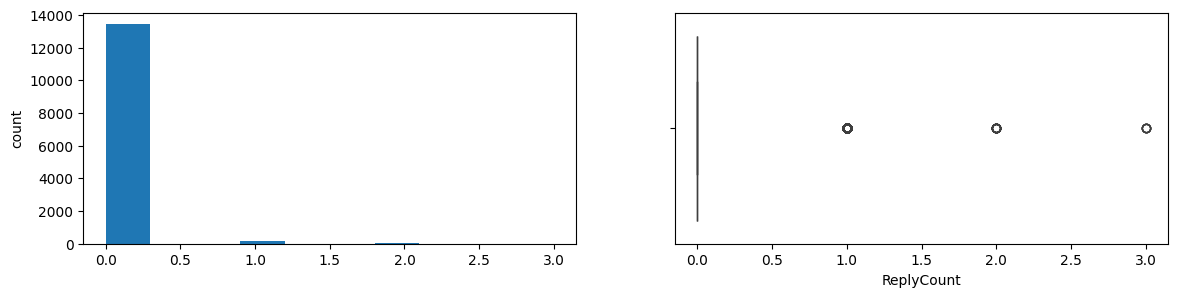

ThumbsUpCount
Skew :  7.89


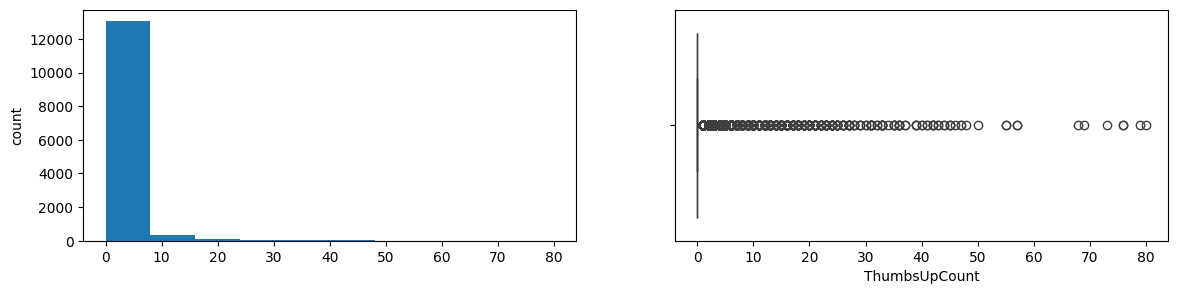

ThumbsDownCount
Skew :  16.66


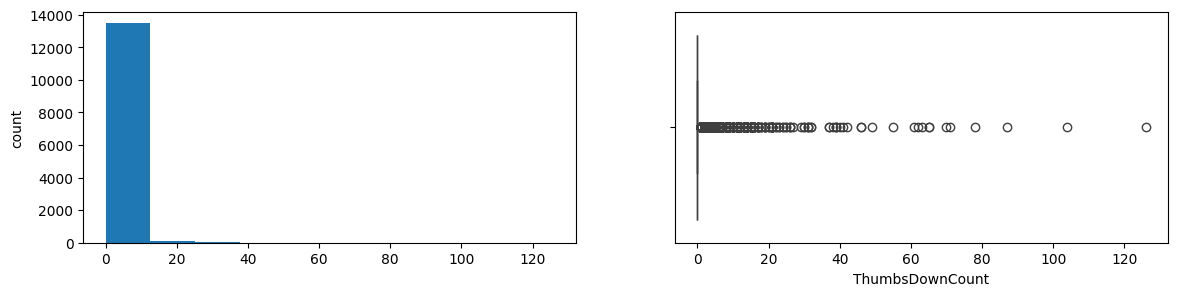

Rating
Skew :  -2.13


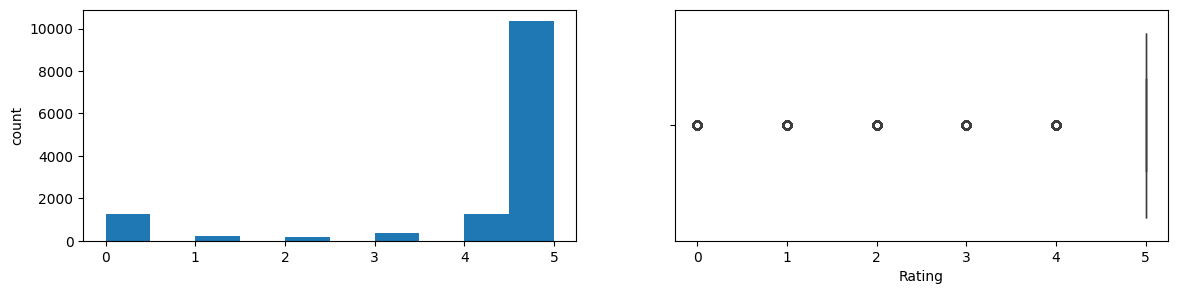

BestScore
Skew :  3.39


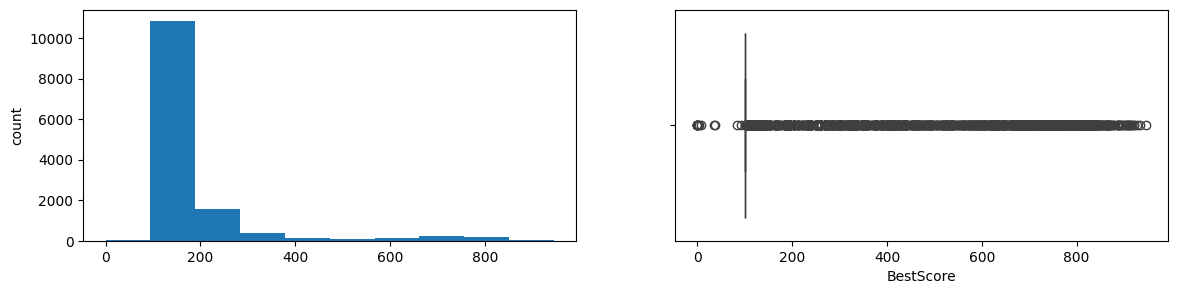

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    print(col)
    print('Skew : ',round(new_train_data[col].skew(),2))
    plt.figure(figsize=(14,3))
    plt.subplot(1,2,1)
    new_train_data[col].hist(grid = False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=new_train_data[col])
    plt.show()

<Figure size 1100x1500 with 0 Axes>

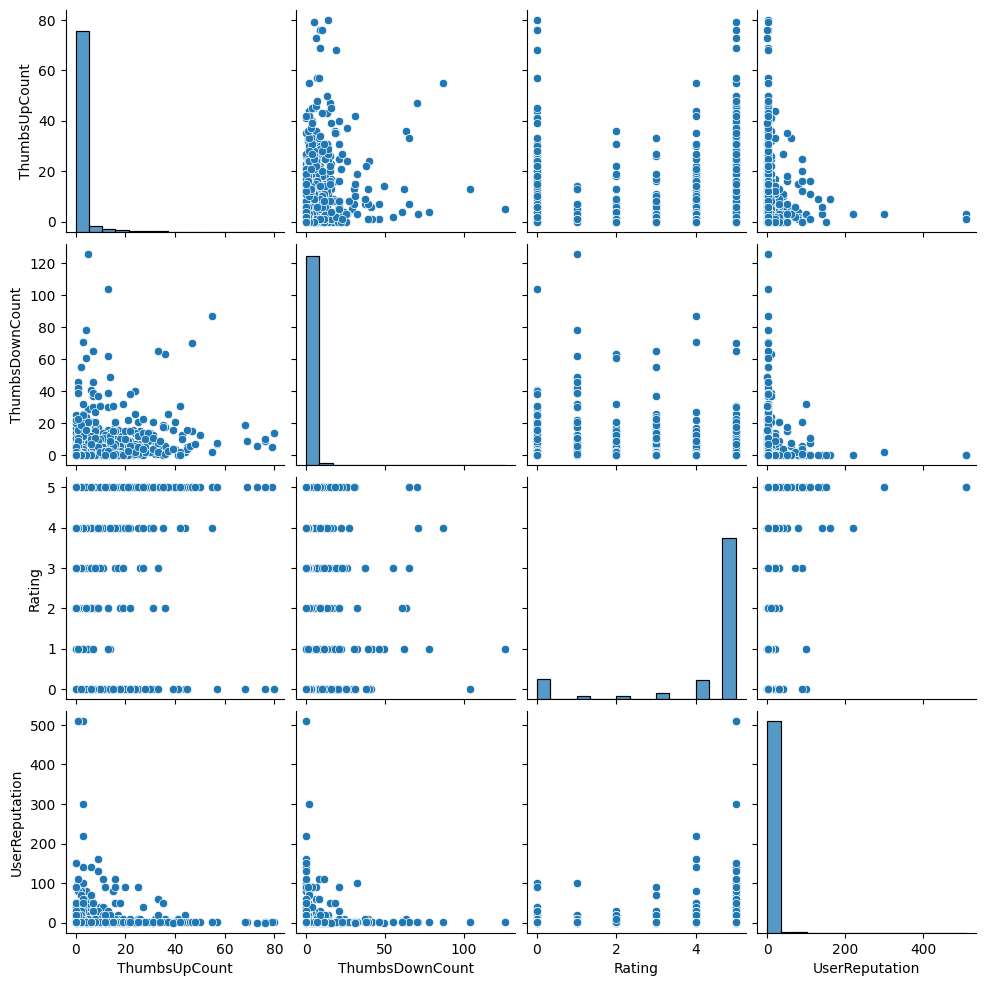

In [121]:
plt.figure(figsize=(11,15))
# Choose a subset of variables if needed
subset_vars = ['ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'UserReputation',]

# Create a pair plot
sns.pairplot(new_train_data[subset_vars])

plt.show()

C:\Users\fkvdn\AppData\Local\Temp\ipykernel_5788\1287945217.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data["ThumbsUpCount"], axlabel="ThumbsUpCount");


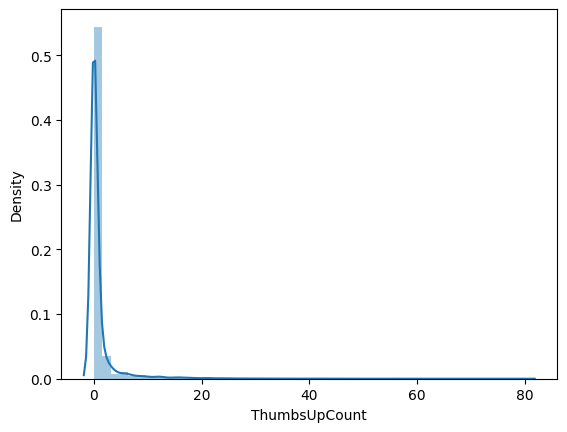

In [122]:

sns.distplot(new_train_data["ThumbsUpCount"], axlabel="ThumbsUpCount");

C:\Users\fkvdn\AppData\Local\Temp\ipykernel_5788\3102639311.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data["ThumbsDownCount"], axlabel="ThumbsDownCount");


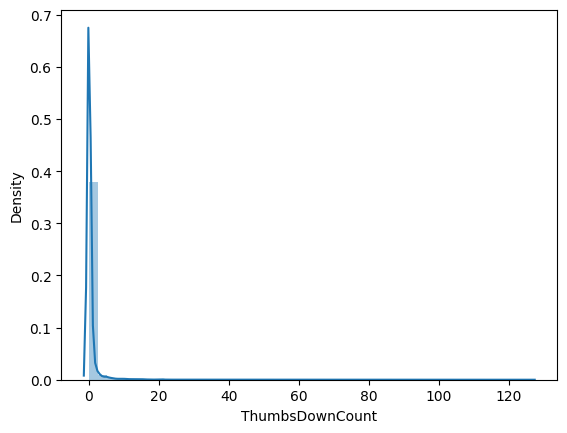

In [123]:

sns.distplot(new_train_data["ThumbsDownCount"], axlabel="ThumbsDownCount");

C:\Users\fkvdn\AppData\Local\Temp\ipykernel_5788\1317377957.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data["UserReputation"], axlabel="UserReputation");


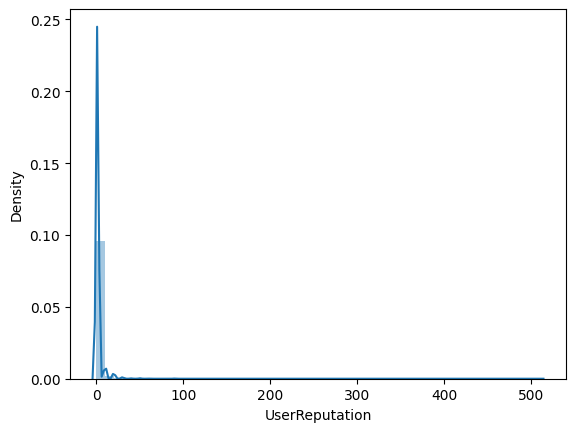

In [124]:

sns.distplot(new_train_data["UserReputation"], axlabel="UserReputation");

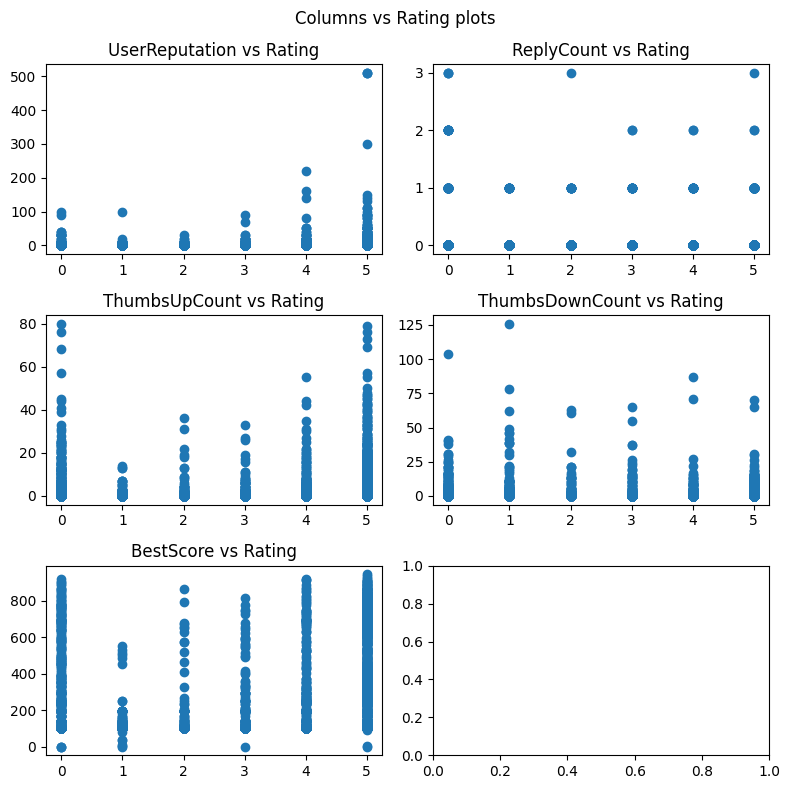

In [125]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

plt.suptitle('Columns vs Rating plots')

# Iterate over the numerical columns
for i, col in enumerate(['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount' , 'BestScore']):
    # Plot the data
    axs[i // 2, i % 2].scatter(new_train_data['Rating'], new_train_data[col])
    # Set the title
    axs[i // 2, i % 2].set_title(f'{col} vs Rating')

plt.tight_layout()

# Display the above plot
plt.show()


In [126]:
Reputation_count = new_train_data.UserReputation.value_counts()
Reputation_count

UserReputation
1      12708
10       478
20       217
0        118
30        54
50        16
40        12
90         7
80         4
60         4
110        3
510        3
100        3
140        2
70         2
220        1
160        1
130        1
150        1
300        1
Name: count, dtype: int64

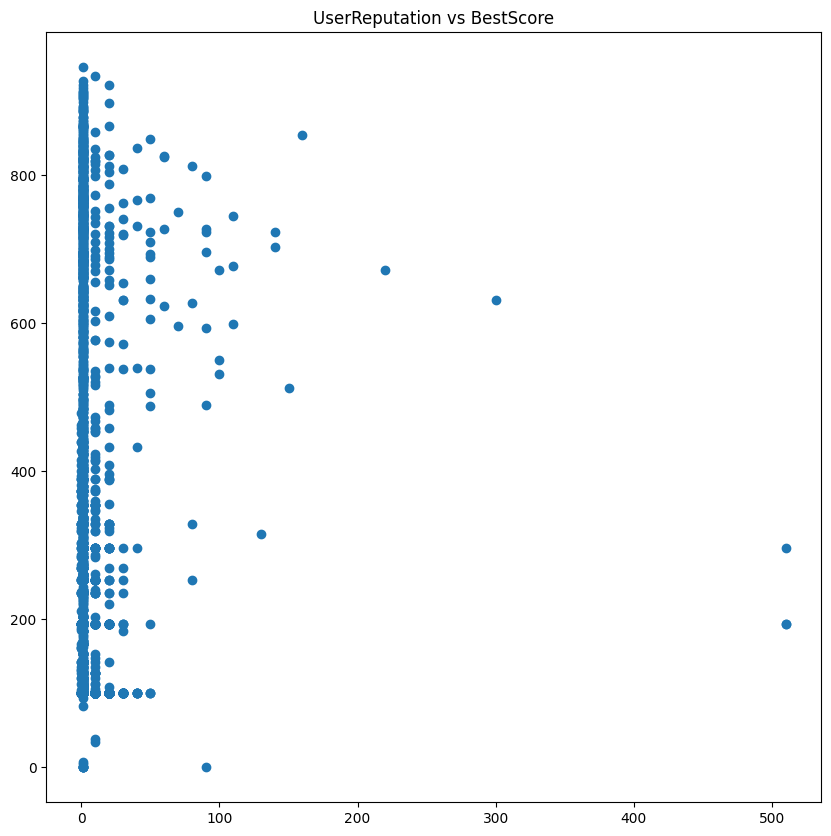

In [127]:
import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data
ax.scatter(new_train_data['UserReputation'], new_train_data['BestScore'])

# Set the title
ax.set_title('UserReputation vs BestScore')

# Display the plot
plt.show()


### Inference from above graph:-

The data shows a scarcity of users with top reputation scores, and even for those users, their reviews aren't consistently the highest-rated. This implies that user reputation alone might not be the strongest indicator of a top review score.

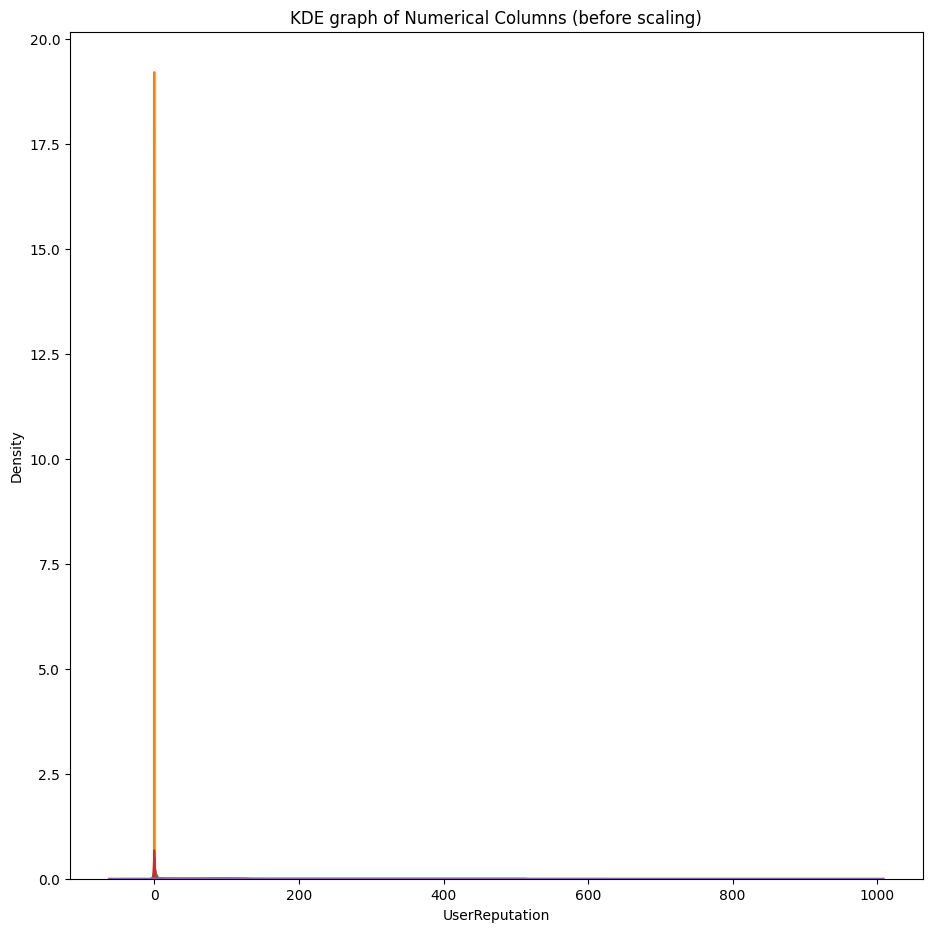

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes
fig, ax = plt.subplots(figsize=(11, 11))

# Iterate over the numerical columns
for col in ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']:
    # Plot the KDE plot
    sns.kdeplot(new_train_data[col], ax=ax)

# Set the title
ax.set_title('KDE graph of Numerical Columns (before scaling)')

# Display the plot
plt.show()


### Inference from above graph:-
From the above graph it is completely visible that there is huge gap between the features so we need to do scaling.

In [129]:
def remove_outliers_iqr(df, columns):
  """
  Removes outliers from the given dataframe using the IQR method.

  Args:
    df: The dataframe to remove outliers from.
    columns: A list of column names to remove outliers from.

  Returns:
    The dataframe with outliers removed.
  """

  for col in columns:

    if df[col].nunique() >= 10:
      # Calculate the IQR
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1

      # Calculating the lower bounds & upper bounds
      lower_bound = Q1 - (1.5 * IQR)
      upper_bound = Q3 + (1.5 * IQR)

      # Removing outliers
      df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Remove outliers from the 'train_data' dataframe, excluding the 'Rating' column
new_train_data = remove_outliers_iqr(new_train_data, new_train_data.columns.drop(['Rating' , 'Recipe_Review']))



In [130]:
new_train_data.head()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
1,1,0,0,1,5,100,This is an easy and quick recipe that is great...
2,1,0,0,0,3,100,I think I was looking for something extra spec...
3,1,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,1,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
5,1,0,1,0,5,193,"Absolutely delicious! Easy, tasty and filling!"


In [131]:
new_train_data.shape

(12708, 7)

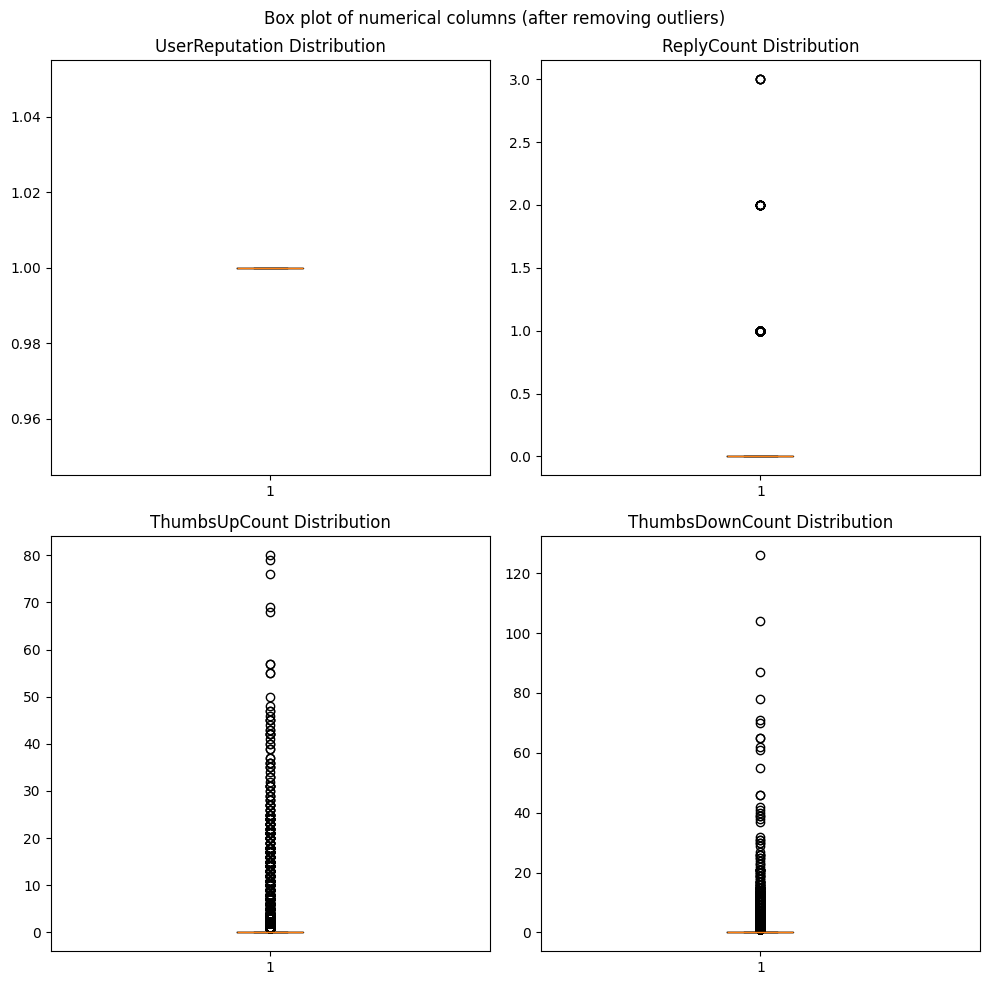

In [132]:
import matplotlib.pyplot as plt
# Create a figure and axes
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

plt.suptitle('Box plot of numerical columns (after removing outliers)')

# Iterate over the numerical columns except 'Rating' and 'BestScore'
for i, col in enumerate(['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount']):
    # Plot the box plot
    axs[i // 2, i % 2].boxplot(new_train_data[col])
    # Set the title
    axs[i // 2, i % 2].set_title(f'{col} Distribution')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

In [133]:

from sklearn.preprocessing import StandardScaler

# selection of  the columns to scale
numerical_features = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']

# Create the object scaler 
scaler = StandardScaler()

# Fit and transform the train and test data
new_train_data[numerical_features] = scaler.fit_transform(new_train_data[numerical_features])
new_test_data[numerical_features] = scaler.fit_transform(new_test_data[numerical_features])


C:\Users\fkvdn\AppData\Local\Temp\ipykernel_5788\3956939109.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_data[numerical_features] = scaler.fit_transform(new_train_data[numerical_features])


In [134]:
new_train_data.head()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
1,0.0,-0.099564,-0.251453,0.156674,5,-0.358093,This is an easy and quick recipe that is great...
2,0.0,-0.099564,-0.251453,-0.158409,3,-0.358093,I think I was looking for something extra spec...
3,0.0,-0.099564,-0.251453,-0.158409,5,-0.358093,This is our favorite grilled chicken recipe. ...
4,0.0,-0.099564,-0.251453,-0.158409,4,-0.358093,Great basic recipe. I added 2 teaspoons Tuscan...
5,0.0,-0.099564,0.002862,-0.158409,5,0.331920,"Absolutely delicious! Easy, tasty and filling!"


In [135]:
new_train_data.shape

(12708, 7)

C:\Users\fkvdn\AppData\Local\Temp\ipykernel_5788\3481092407.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(new_train_data[col], ax=ax)


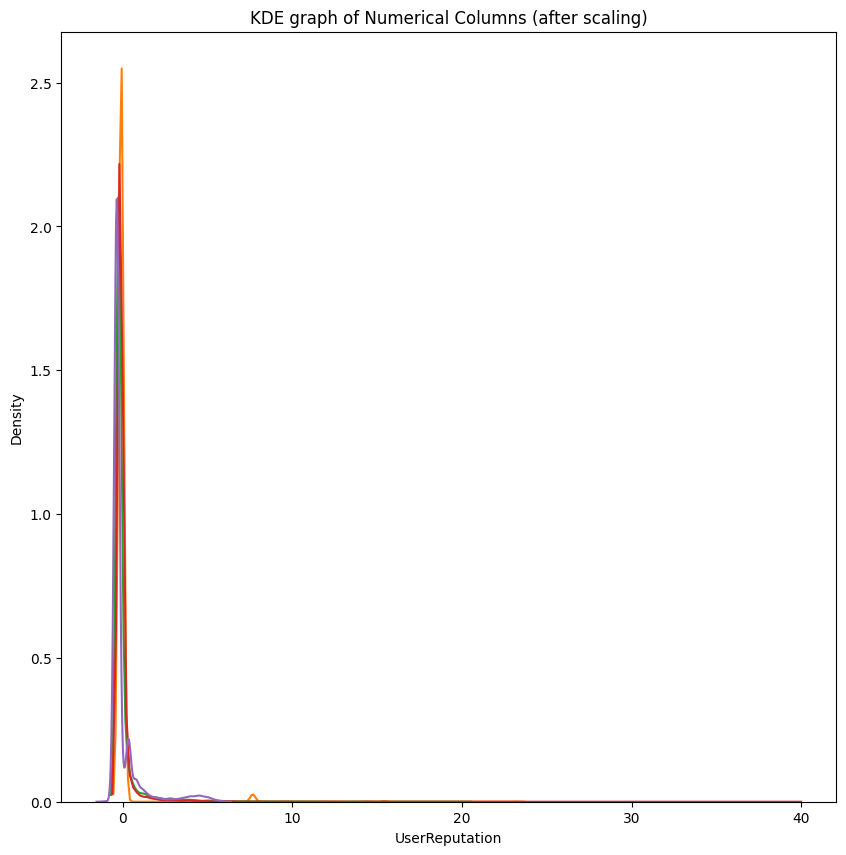

In [136]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Iterate over the numerical columns
for col in ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']:
    # Plot the KDE plot
    sns.kdeplot(new_train_data[col], ax=ax)

# Set the title
ax.set_title('KDE graph of Numerical Columns (after scaling)')

# Display the plot
plt.show()

- Outlier Impact:
  - Certain Features Less Affected: Reply count, thumbs up count, and thumbs down count weren't significantly influenced by outliers. However, the user reputation box plot clearly revealed their impact.
  - Outlier Removal and Model Training: Removing outliers helps ensure that any methods sensitive to outliers won't behave erratically during model training.
  
  
- KDE Distribution and Scaling:
  - Uneven Distribution Before Scaling: The KDE plot before scaling shows that a single feature dominated the density of the numerical data. In simpler terms, most of the data points were clustered around a single feature.
  - Balanced Distribution After Scaling: After scaling all the features, we see some negative values that weren't present earlier. However, the density is now spread more evenly across all features, indicating a more balanced distribution.  

# Preparing Reviews of the users

The Recipe_Review column stands out in our data. While we can't simply remove it because reviews clearly influence recipe ratings, its string format containing human responses necessitates Natural Language Processing (NLP) techniques for handling it effectively.

So we Transform the text in the Recipe_Review column using TF-IDF vectorization. This process will convert the reviews into numerical features.

By applying these methods (like TF-IDF vectorization), we essentially bridge the gap between human language and machines. The reviews are transformed into a format that computers can understand and process effectively.

In [137]:
non_string_indices = []

# Iterate over each row in the 'Recipe_Review' column
for i, row in new_train_data['Recipe_Review'].items():
    # Check if the data type is not string
    if not isinstance(row, str):
        non_string_indices.append(i)

# Print the indices of non-string/empty row values in the 'Recipe_Review'
print(non_string_indices)


[2984, 11654]


In [138]:
new_train_data = new_train_data.drop(non_string_indices)

In [139]:

# Finding the indices of rows with NaN values in any column
nan_indices = new_train_data.index[new_train_data.isna().any(axis=1)]

# Printing the indices
print(nan_indices)


Index([], dtype='int64')


In [140]:
# This is done because we have no idea if the feature 'Recipe_Review' has same data in new_train_data and new_test_data.
# So we need to concatinate the data of new_train_data and new_test_data.
# I came to this solution when I fitted on new_train_data and when I try to transform the new_test_data it gave me error.
# That on some values the TfidfVectorizer is not fitted.
fit_data = pd.concat([new_train_data['Recipe_Review'],new_test_data['Recipe_Review']])

In [141]:
fit_data

1       This is an easy and quick recipe that is great...
2       I think I was looking for something extra spec...
3       This is our favorite grilled chicken recipe.  ...
4       Great basic recipe. I added 2 teaspoons Tuscan...
5        Absolutely delicious!   Easy, tasty and filling!
                              ...                        
4541    This is an absolutely wonderful seafood recipe...
4542    This us a definite &#34;OMG&#34;.  Tastes sinf...
4543    absolutely great....even husband and grandson ...
4544    I followed directions. It tastes very bland. V...
4545    After reading the amazing reviews, I decided t...
Name: Recipe_Review, Length: 17252, dtype: object

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidVectorizer
tf = TfidfVectorizer(stop_words='english', max_features=6151)

# Fitting the above fit_data
tf.fit(fit_data)

# transform the 'Recipe_Review' column
review_matrix_train = tf.transform(new_train_data['Recipe_Review'])

# Print the shape of the transformed data
print(review_matrix_train.shape)

# Create a DataFrame with the review matrix
review_df_train = pd.DataFrame(review_matrix_train.toarray(), columns=tf.get_feature_names_out())


(12706, 6151)


In [143]:
review_df_train

,00,02,03,05,08,10,100,10x,10x13,10x15,...,zipper,zippy,zoodles,zucc,zucchini,zucchinis,zuchini,zuchinni,zucs,zuke
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
new_train_data.shape

(12706, 7)

In [145]:
new_train_data = pd.concat([new_train_data.reset_index(drop=True), review_df_train.reset_index(drop=True)], axis=1)

In [146]:
new_train_data.shape

(12706, 6158)

In [147]:
new_train_data

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,00,02,03,...,zipper,zippy,zoodles,zucc,zucchini,zucchinis,zuchini,zuchinni,zucs,zuke
0,0.0,-0.099564,-0.251453,0.156674,5,-0.358093,This is an easy and quick recipe that is great...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-0.099564,-0.251453,-0.158409,3,-0.358093,I think I was looking for something extra spec...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-0.099564,-0.251453,-0.158409,5,-0.358093,This is our favorite grilled chicken recipe. ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-0.099564,-0.251453,-0.158409,4,-0.358093,Great basic recipe. I added 2 teaspoons Tuscan...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.099564,0.002862,-0.158409,5,0.331920,"Absolutely delicious! Easy, tasty and filling!",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12701,0.0,-0.099564,-0.251453,-0.158409,5,-0.358093,Delicious!! Very easy to make! One minor chang...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12702,0.0,-0.099564,-0.251453,-0.158409,5,-0.358093,I made this pie for my family and they loved i...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12703,0.0,-0.099564,-0.251453,-0.158409,5,-0.358093,Very tasty!,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12704,0.0,-0.099564,-0.251453,-0.158409,5,-0.358093,I have made this numerous times. It&#39;s so ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
# transform the 'Recipe_Review' in test data
review_matrix_test = tf.transform(new_test_data['Recipe_Review'])

# Print the shape of the transformed data
print(review_matrix_test.shape)

# Create a DataFrame with the review matrix
review_df_test = pd.DataFrame(review_matrix_test.toarray(), columns=tf.get_feature_names_out())


(4546, 6151)


In [149]:
review_df_test

,00,02,03,05,08,10,100,10x,10x13,10x15,...,zipper,zippy,zoodles,zucc,zucchini,zucchinis,zuchini,zuchinni,zucs,zuke
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.144895,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4542,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4543,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
new_test_data.shape

(4546, 6)

In [151]:
new_test_data = pd.concat([new_test_data.reset_index(drop=True), review_df_test.reset_index(drop=True)], axis=1)

In [152]:
new_test_data.shape

(4546, 6157)

In [153]:
new_test_data.columns = new_test_data.columns.astype(str)
new_test_data = new_test_data.drop(['Recipe_Review'], axis=1)

# Performing split on train_data and test_data

Since the 'test_data.csv' file lacks a 'Rating' column, we'll only split the 'train_data' file to create datasets for prediction and accuracy evaluation.

In [154]:

new_train_data.columns = new_train_data.columns.astype(str)


In [155]:

X = new_train_data.drop(['Rating', 'Recipe_Review'], axis=1)
y = new_train_data['Rating']



In [156]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10164, 6156), (2542, 6156), (10164,), (2542,))

In [157]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a LinearSVC classifier
model_1 = LinearSVC(max_iter=2500)

# Fit the classifier to the train_dataing data
model_1.fit(X_train, y_train)

# Predict on the test_data data
y_pred_model_1 = model_1.predict(X_test)


# Printing classification_report and accuracy_score 
report = classification_report(y_test, y_pred_model_1)
print("Classification Report:\n", report)
print("Accuracy using Model_1: ", accuracy_score(y_test, y_pred_model_1))


c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.15      0.22       246
           1       0.39      0.17      0.24        41
           2       0.42      0.15      0.22        33
           3       0.38      0.14      0.21        69
           4       0.36      0.14      0.20       224
           5       0.81      0.97      0.88      1929

    accuracy                           0.77      2542
   macro avg       0.46      0.29      0.33      2542
weighted avg       0.71      0.77      0.72      2542

Accuracy using Model_1:  0.7714398111723053


c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [158]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model_2 = RandomForestClassifier(n_estimators=500)

# Fit the classifier to the train_dataing data
model_2.fit(X_train, y_train)

# Predict on the test_data data
y_pred_model_2 = model_2.predict(X_test)

# Printing classification_report and accuracy_score 
report = classification_report(y_test, y_pred_model_1)
print("Classification Report:\n", report)
print("Accuracy using Model_2: ", accuracy_score(y_test, y_pred_model_2))


Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.15      0.22       246
           1       0.39      0.17      0.24        41
           2       0.42      0.15      0.22        33
           3       0.38      0.14      0.21        69
           4       0.36      0.14      0.20       224
           5       0.81      0.97      0.88      1929

    accuracy                           0.77      2542
   macro avg       0.46      0.29      0.33      2542
weighted avg       0.71      0.77      0.72      2542

Accuracy using Model_2:  0.7686860739575138


In [159]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier   
model_3 = LogisticRegression(max_iter=1500)

# Fit the classifier to the train_dataing data
model_3.fit(X_train, y_train)

# Predict on the test_data data
y_pred_model_3 = model_3.predict(X_test)

# Printing classification_report and accuracy_score 
report = classification_report(y_test, y_pred_model_3)
print("Classification Report:\n", report)
print("Accuracy using Model_3: ", accuracy_score(y_test, y_pred_model_3))

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.09      0.15       246
           1       0.44      0.10      0.16        41
           2       0.00      0.00      0.00        33
           3       0.36      0.07      0.12        69
           4       0.57      0.09      0.16       224
           5       0.79      0.99      0.88      1929

    accuracy                           0.77      2542
   macro avg       0.43      0.22      0.25      2542
weighted avg       0.71      0.77      0.70      2542

Accuracy using Model_3:  0.7726199842643587


In [160]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
model_4 = GradientBoostingClassifier()

# Fit the classifier to the train_dataing data
model_4.fit(X_train,y_train)

# Predict on the test_data data
y_pred_model_4 = model_4.predict(X_test)

# Printing classification_report and accuracy_score 
report = classification_report(y_test, y_pred_model_4)
print("Classification Report:\n", report)
print("Accuracy using Model_4: ", accuracy_score(y_test, y_pred_model_4))


Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.04      0.07       246
           1       0.22      0.12      0.16        41
           2       0.20      0.09      0.12        33
           3       0.36      0.12      0.18        69
           4       0.36      0.04      0.07       224
           5       0.78      0.99      0.87      1929

    accuracy                           0.76      2542
   macro avg       0.39      0.23      0.24      2542
weighted avg       0.68      0.76      0.69      2542

Accuracy using Model_4:  0.7635719905586152


In [161]:
# from sklearn.model_selection import RandomizedSearchCV

# # Defining the parameters
# param_distributions=[{'max_depth':[2,4,6,8,10],'learning_rate':[0.001,0.01,0.1],'n_estimators':[50,100,150]}]

# # Creating Randomized Search CV on model_4(GradientBoostingClassifier)
# model_5 = RandomizedSearchCV(model_4,param_distributions=param_distributions,scoring='neg_mean_absolute_error',n_iter =10,random_state=0,n_jobs=-1,)

# # Fit the RandomizedSearchCV on the train_dataing data
# model_5.fit(X_train,y_train)

# # Predict on the test_data data
# y_pred_model_5 = model_5.predict(X_test)

# # Printing classification_report and accuracy_score 
# report = classification_report(y_test, y_pred_model_5)
# print("Classification Report:\n", report)
# print("Accuracy using Model_5: ", accuracy_score(y_test, y_pred_model_5))


In [162]:
from xgboost import XGBClassifier

# Create a XGBoost classifier
model_6 = XGBClassifier(n_estimators=500)

# Fit the classifier to the train_dataing data
model_6.fit(X_train, y_train)

# Predict on the test_data data
y_pred_model_6 = model_6.predict(X_test)

# Printing classification_report and accuracy_score 
report = classification_report(y_test, y_pred_model_6)
print("Classification Report:\n", report)
print("Accuracy using Model_6: ", accuracy_score(y_test, y_pred_model_6))


Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.16      0.23       246
           1       0.60      0.29      0.39        41
           2       0.36      0.12      0.18        33
           3       0.36      0.13      0.19        69
           4       0.32      0.11      0.16       224
           5       0.80      0.97      0.88      1929

    accuracy                           0.77      2542
   macro avg       0.48      0.30      0.34      2542
weighted avg       0.71      0.77      0.72      2542

Accuracy using Model_6:  0.7698662470495673


In [163]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [164]:
# Define the base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=500)),
    ('svc', LinearSVC(max_iter=10000)),
    ('xgb', XGBClassifier(n_estimators=1000))
]

# Define the final model
final_estimator = LogisticRegression(max_iter=1500)

# Create the stacking classifier
model_7 = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

# Fit the classifier to the train_dataing data
model_7.fit(X_train, y_train)

# Predict on the test_data data
y_pred_model_7 = model_7.predict(X_test)

# Printing classification_report and accuracy_score 
report = classification_report(y_test, y_pred_model_7)
print("Classification Report:\n", report)
print("Accuracy using Model_7: ", accuracy_score(y_test, y_pred_model_7))


c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-pa

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.16      0.24       246
           1       0.39      0.29      0.33        41
           2       0.67      0.06      0.11        33
           3       0.28      0.16      0.20        69
           4       0.55      0.10      0.17       224
           5       0.81      0.98      0.89      1929

    accuracy                           0.78      2542
   macro avg       0.53      0.29      0.32      2542
weighted avg       0.73      0.78      0.72      2542

Accuracy using Model_7:  0.7797010228166797


In [165]:
# Define the base models
estimators = [
    ('lr', LogisticRegression(max_iter=1500)),
    ('svc', LinearSVC(max_iter=2500)),
    ('xgb', XGBClassifier(n_estimators=1000))
]

# Define the final model
final_estimator = RandomForestClassifier(n_estimators=500)

# Create the stacking classifier
model_8 = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

# Fit the classifier to the train_dataing data
model_8.fit(X_train, y_train)

# Predict on the test_data data
y_pred_model_8 = model_8.predict(X_test)

# Printing classification_report and accuracy_score 
report = classification_report(y_test, y_pred_model_8)
print("Classification Report:\n", report)
print("Accuracy using Model_8: ", accuracy_score(y_test, y_pred_model_8))



c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-pa

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.16      0.24       246
           1       0.42      0.37      0.39        41
           2       0.36      0.12      0.18        33
           3       0.30      0.14      0.20        69
           4       0.46      0.14      0.21       224
           5       0.82      0.98      0.89      1929

    accuracy                           0.78      2542
   macro avg       0.47      0.32      0.35      2542
weighted avg       0.72      0.78      0.73      2542

Accuracy using Model_8:  0.7812745869394178


In [166]:
from sklearn.neighbors import KNeighborsClassifier
model_9=KNeighborsClassifier(n_neighbors=250,weights="distance",leaf_size=300,p=5)

# Fit the classifier to the train_dataing data
model_9.fit(X_train,y_train)

# Predict on the test_data data
y_pred_model_9 = model_9.predict(X_test)

# Printing classification_report and accuracy_score 
report = classification_report(y_test, y_pred_model_9)
print("Classification Report:\n", report)
print("Accuracy using Model_9: ", accuracy_score(y_test, y_pred_model_9))



Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.05      0.10       246
           1       1.00      0.02      0.05        41
           2       1.00      0.03      0.06        33
           3       0.50      0.01      0.03        69
           4       1.00      0.03      0.05       224
           5       0.77      1.00      0.87      1929

    accuracy                           0.77      2542
   macro avg       0.84      0.19      0.19      2542
weighted avg       0.79      0.77      0.67      2542

Accuracy using Model_9:  0.7655389457120377


In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier

model_reg= LogisticRegression(solver='saga',max_iter=1000,C=10)
model_ridge=RidgeClassifier(max_iter=10000, alpha=1.0)
model_svm=LinearSVC(C=0.1)

model_10=VotingClassifier(
    estimators=[
        ('reg', model_reg),
        ('ridge_clf', model_ridge),
        ('svm', model_svm)
    ],
    voting='hard'
)
# Fit the classifier to the train_dataing data
model_10.fit(X_train,y_train)

# Predict on the test_data data
y_pred_model_10 = model_10.predict(X_test)

# Printing classification_report and accuracy_score 
report = classification_report(y_test, y_pred_model_10)
print("Classification Report:\n", report)
print("Accuracy using Model_10: ", accuracy_score(y_test, y_pred_model_10))


c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fkvdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.10      0.16       246
           1       0.40      0.10      0.16        41
           2       0.50      0.03      0.06        33
           3       0.42      0.12      0.18        69
           4       0.49      0.08      0.14       224
           5       0.79      0.99      0.88      1929

    accuracy                           0.77      2542
   macro avg       0.50      0.24      0.26      2542
weighted avg       0.71      0.77      0.70      2542

Accuracy using Model_10:  0.7718332022029898


## After training 10 models
- model_7 which is  StackingClassifier with final estimators as LogisticRegression and support estimators RandomForestClassifier,LinearSVC and XGBClassifier gives the highest accuracy.

In [170]:
accuracy_1 = accuracy_score(y_test, y_pred_model_1)

accuracy_2 = accuracy_score(y_test, y_pred_model_2)

accuracy_3 = accuracy_score(y_test, y_pred_model_3)

accuracy_4 = accuracy_score(y_test, y_pred_model_4)

# accuracy_5 = accuracy_score(y_test, y_pred_model_5)

accuracy_6 = accuracy_score(y_test, y_pred_model_6)

accuracy_7 = accuracy_score(y_test, y_pred_model_7)

accuracy_8 = accuracy_score(y_test, y_pred_model_8)

accuracy_9 = accuracy_score(y_test, y_pred_model_9)

accuracy_10 = accuracy_score(y_test, y_pred_model_10)


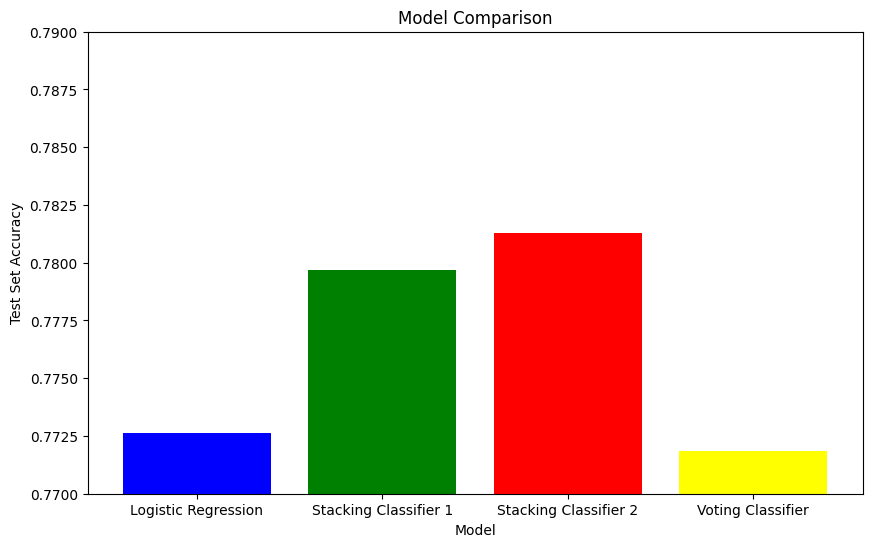

In [175]:
#plotting the graph for the coparision of models


model_names = ['Logistic Regression', 'Stacking Classifier 1', 'Stacking Classifier 2','Voting Classifier' ]


accuracies = [accuracy_3, accuracy_7, accuracy_8, accuracy_10]


plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'yellow'])


plt.title('top 4 Models Comparison')
plt.xlabel('Model')
plt.ylabel('Test Set Accuracy')
plt.ylim(0.77,0.79,)

# Show the plot
plt.show()


# Saving the final submission file

while keeping in mind that we had 2 columns , 'ID' and 'Rating' in the sample.csv file , we need to create a similar submission file. One more thing to keep in mind is , 'ID' column starts from 1 and not 0.

In [168]:
submission = pd.DataFrame(model_7.predict(new_test_data), columns=['Rating'])
submission.index.name = 'ID'
# Add 1 to the index to start from 1 instead of 0
submission.index += 1
submission.to_csv("submission.csv", encoding='utf-8')

output = pd.read_csv("submission.csv")